# Linear Regressions

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn import model_selection as ms
sklearn.set_config(print_changed_only=False)

import xgboost

import import_ipynb
from _Self_Written_Functions_Sheet import rmse

importing Jupyter notebook from _Self_Written_Functions_Sheet.ipynb


In [2]:
hp_full_strd = pd.read_csv('..\hp_2a_ranked_edited_dum_full_train.csv', index_col=0)
hp_full_strd

,LotFrontage,LotArea,Street,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-1/2 STORY PUD - ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YrSold_2006.0,YrSold_2007.0,YrSold_2008.0,YrSold_2009.0,YrSold_2010.0
0,0.150685,0.033420,1.0,0.0,1.0,0.666667,0.500,0.949275,0.883333,0.122500,0.666667,0.50,0.8,0.75,0.25,1.000000,0.176060,0.166667,0.000000,0.064212,0.168008,1.00,1.0,1.00,0.10

In [3]:
hp_logsaleprice = pd.read_csv('..\hp_1a_no_imputation_logsaleprice.csv', index_col=0)
hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1453,12.072541
1454,12.254863
1455,12.493130
1456,11.864462


## Attempting Multilinear Regression

## Using hp_full_strd dataset

In [4]:
state = 0

# setting up train and test sets
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_full_strd,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

# Must flatten to fit
ytrain = ytrain.values.flatten()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

In [5]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

lm = LinearRegression()

# parameters to use
normilize = [True, False]
fitintercept = [True, False]
gparam_mlr_1 = {'fit_intercept': fitintercept, 'normalize': normilize}

# setting parameters
gs_mlr_1 = ms.GridSearchCV(lm, gparam_mlr_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_mlr_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_mlr_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr_1, ytrain, xtrain)) 
test_rmse.append(rmse(gs_mlr_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_mlr_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df

Wall time: 2.33 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,fit_intercept,normalize
0,0.944759,0.921337,0.093157,0.115461,-0.022305,False,True


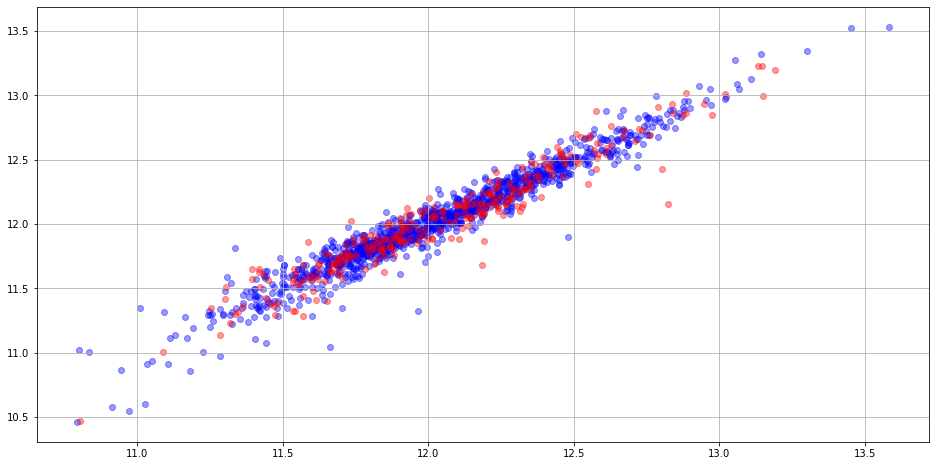

In [6]:
plt.figure(figsize=(16, 8))
plt.scatter(gs_mlr_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_mlr_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

## Trying with Lasso

In [7]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

lasso = Lasso(random_state=state, max_iter=1000000, selection='random',
              normalize=True, fit_intercept=True)

# parameters to use
alphas = np.linspace(1e-4, 2.5e-4, 30)
gparam_lasso_1 = {'alpha': alphas}

# setting parameters
gs_lasso_1 = ms.GridSearchCV(lasso, gparam_lasso_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_lasso_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_lasso_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_lasso_1, ytrain, xtrain))
test_rmse.append(rmse(gs_lasso_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_lasso_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lasso_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lasso_res_df = pd.DataFrame(lasso_list_results).T
lasso_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lasso_res_df = pd.concat([lasso_res_df, best_par_df], axis=1, sort=False)

lasso_res_df

Wall time: 1.48 s


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,alpha
0,0.92888,0.93684,0.105701,0.10346,0.002242,0.000126


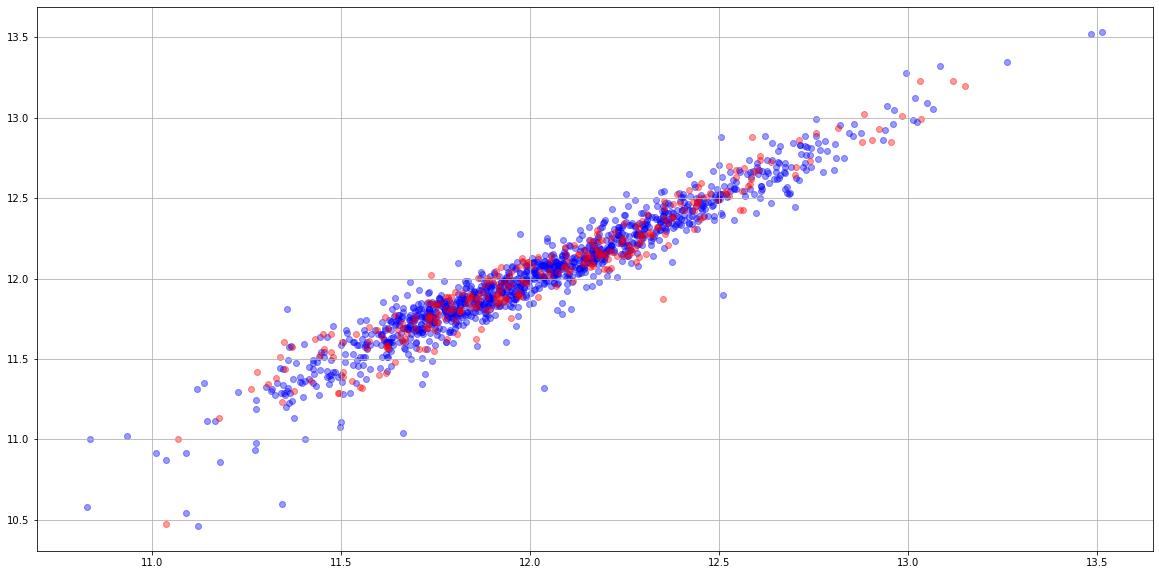

In [8]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_lasso_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

- we see underfitting

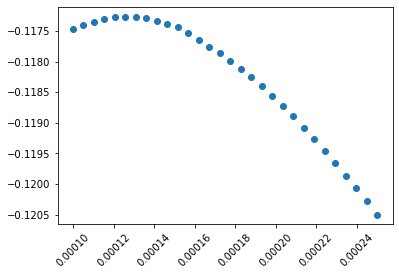

In [9]:
plt.xticks(rotation=45)
plt.scatter(gs_lasso_1.cv_results_['param_alpha'], gs_lasso_1.cv_results_['mean_test_score'])

## Using reduced DF hp_full_strd

In [10]:
lasso_coef_strd = pd.Series(gs_lasso_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(lasso_coef_strd.abs().sort_values(ascending=False).to_string())

GrLivArea                                                           1.226336
OverallQual                                                         0.487308
TotalBsmtSF                                                         0.390860
LotArea                                                             0.364952
OverallCond                                                         0.259676
BsmtFinSF1                                                          0.233021
YearBuilt                                                           0.184939
Functional                                                          0.166622
GarageCars                                                          0.149412
1stFlrSF                                                            0.130317
Exterior1st_BrkComm                                                 0.123917
Neighborhood_Crawfor                                                0.100764
Street                                                              0.093758

In [11]:
lasso_coef_index_01 = [i for i, x in enumerate(lasso_coef_strd) if abs(x) > 0]

hp_lasso_strd_reduced = hp_full_strd.iloc[:,lasso_coef_index_01]

# hp_lasso_strd_reduced.to_csv('..\hp_lasso_strd_reduced.csv')
hp_lasso_strd_reduced

,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,Fence,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSZoning_FV,MSZoning_RL,LotShape_IR2,LotShape_Reg,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Condition1_Norm,Condition1_RRAe,Condition1_RRAn,BldgType_TwnhsI,HouseStyle_2.5Fin,RoofStyle_Gable,RoofMatl_Membran,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior2nd_Stucco,MasVnrType_Stone,Foundation_PConc,Heating_Grav,FireplaceQu_Gd,FireplaceQu_None,GarageType_Basment,GarageType_CarPort,SaleType_ConLI,SaleType_New,SaleCondition_Normal,SaleCondition_Partial,YrSold_2009.0
0,0.150685,0.033420,1.0,0.666667,0.500,0.949275,0.883333,0.122500,0.666667,0.8,0.25,1.000000,0.176060,0.168008,1.00,1.0,0.109641,0.289015,0.333333,0.50,0.5,0.333333,0.666667,0.461538,1.000000,0.00,0.666667,0.4,0.368280,0.6,1.0,0.000000,0.082210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.202055,0.038795,1.0,0.555556,0.875,0.753623,0.433333,0.000000,0.333333,0.8,1.00,0.833333,0.243890,0.247694,1.00,1.0,0.194917,0.194917,0.000000,0.50,0.0,0.333333,0.333333,0.307692,1.000000,0.25,0.666667,0.4,0.309140,0.6,1.0,0.209270,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.160959,0.046507,1.0,0.666667,0.500,0.934783,0.866667,0.101250,0.666667,0.8,0.50,1.000000,0.121197,0.180569,1.00,1.0,0.123083,0.304978,0.333333,0.50,0.5,0.333333,0.666667,0.307692,1.000000,0.25,0.666667,0.4,0.408602,0.6,1.0,0.000000,0.056604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.133562,0.038561,1.0,0.666667,0.500,0.311594,0.333333,0.000000,0.333333,0.6,0.25,0.833333,0.053865,0.148381,0.75,1.0,0.131695,0.290485,0.333333,0.25,0.0,0.333333,0.666667,0.384615,1.000000,0.25,0.333333,0.6,0.431452,0.6,1.0,0.000000,0.047170,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.215753,0.060576,1.0,0.777778,0.500,0.927536,0.833333,0.218750,0.666667,0.8,0.75,1.000000,0.163342,0.224730,1.00,1.0,0.170342,0.391514,0.333333,0.50,0.5,0.333333,0.666667,0.538462,1.000000,0.25,0.666667,0.6,0.561828,0.6,1.0,0.134831,0.113208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0.140411,0.030929,1.0,0.555556,0.500,0.920290,0.833333,0.000000,0.333333,0.8,0.25,0.166667,0.000000,0.187046,1.00,1.0,0.130015,0.275782,0.000000,0.50,0.5,0.333333,0.333333,0.384615,1.000000,0.25,0.666667,0.4,0.309140,0.6,1.0,0.000000,0.053908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0

## features that were kept with lasso

In [12]:
list(hp_lasso_strd_reduced.columns)

['LotFrontage',
 'LotArea',
 'Street',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'Fence',
 'MSSubClass_1-STORY 1945 & OLDER',
 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
 'MSSubClass_2-STORY 1945 & OLDER',
 'MSSubClass_2-STORY PUD - 1946 & NEWER',
 'MSZoning_FV',
 'MSZoning_RL',
 'LotShape_IR2',
 'LotShape_Reg',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Somerst',
 'Nei

In [13]:
# columns that were dropped by lasso

lasso_coef_index_00 = [i for i, x in enumerate(lasso_coef_strd) if abs(x) == 0]
hp_lasso_strd_dropped = hp_full_strd.iloc[:, lasso_coef_index_00]
list(hp_lasso_strd_dropped.columns)

['Alley',
 'Utilities',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Electrical',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'GarageYrBlt',
 'GarageCond',
 'EnclosedPorch',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'MiscVal',
 'MoSold',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_1-1/2 STORY PUD - ALL AGES',
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_2-STORY 1946 & NEWER',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'MSSubClass_SPLIT FOYER',
 'MSSubClass_SPLIT OR MULTI-LEVEL',
 'MSZoning_RH',
 'MSZoning_RM',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_B

## using the lasso reduced dataset in multilinear regression

In [14]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train_lso and test_lso sets
xtrain_lso, xtest_lso, ytrain_lso, ytest_lso = ms.train_test_split(hp_lasso_strd_reduced,
                                                                   hp_logsaleprice,
                                                                   test_size=0.2,
                                                                   random_state=0)

# Must flatten to fit
ytrain_lso = ytrain_lso.values.flatten()

lm = LinearRegression()

# parameters to use
fitintercept = [True, False]
gparam_mlr = {'fit_intercept': fitintercept}

# setting parameters
gs_mlr = ms.GridSearchCV(lm, gparam_mlr, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr.fit(xtrain_lso, ytrain_lso)

# setting up dataframe for results
train_scores.append(gs_mlr.best_estimator_.score(xtrain_lso, ytrain_lso))
test_scores.append(gs_mlr.best_estimator_.score(xtest_lso, ytest_lso))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr, ytrain_lso, xtrain_lso))
test_rmse.append(rmse(gs_mlr, ytest_lso, xtest_lso))

# add the best parameters to the df
best_par_list.append(gs_mlr.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'train_rmse', 'test_rmse', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df_sel2 = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_sel2

Wall time: 26.5 ms


,TrainScores,TestScores,train_rmse,test_rmse,DiffRMSE,fit_intercept
0,0.933974,0.930441,0.101846,0.108575,-0.006729,True


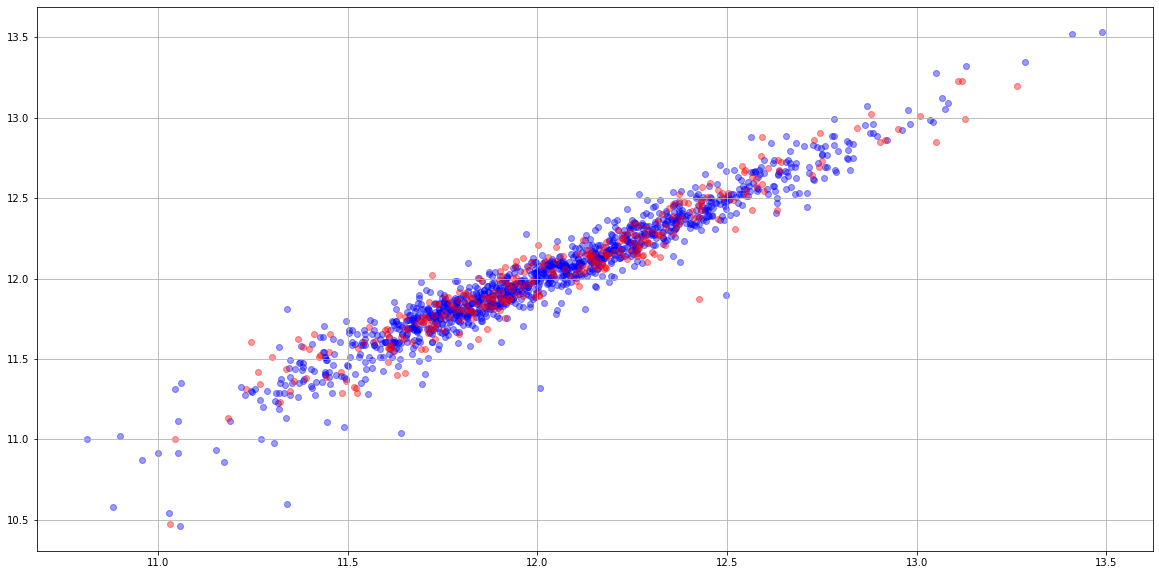

In [15]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr.best_estimator_.predict(xtrain_lso), ytrain_lso, color='blue', alpha=0.4)
plt.scatter(gs_mlr.best_estimator_.predict(xtest_lso), ytest_lso, color='red', alpha=0.4)
plt.grid(which='both')

## Trying w Ridge

In [16]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

ridge = Ridge(random_state=state, max_iter=10000, fit_intercept=True)

# parameters to use
# alphas = np.linspace(1e-4, 2.5e-4, 30) 'alpha': alphas,
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
fitintercept = [True, False]

gparam_ridge_1 = {'solver': solvers,
                  'fit_intercept': fitintercept, 
                  'random_state': [state]}

# setting parameters
gs_ridge_1 = ms.GridSearchCV(ridge, gparam_ridge_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_ridge_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_ridge_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_ridge_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_ridge_1, ytrain, xtrain))
test_rmse.append(rmse(gs_ridge_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_ridge_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
ridge_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
ridge_res_df = pd.DataFrame(ridge_list_results).T
ridge_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
ridge_res_df = pd.concat([ridge_res_df, best_par_df], axis=1, sort=False)

ridge_res_df

C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.12138908 -0.12138908 -0.12138908 -0.12152872 -0.12146837 -0.12138718
 -0.12136287         nan -0.19757183 -0.19757183 -0.19757183 -0.20029428
 -0.30841799 -0.19861484 -0.20048757         nan]
  warnings.warn(
C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [-0.09358824 -0.09358824 -0.09358824 -0.09369061 -0.09372461 -0.09367369
 -0.09381425         nan -0.13296566 -0.13296566 -0.13296566 -0.13534808
 -0.27478742 -0.13452493 -0.13722824         nan]
  warnings.warn(


Wall time: 572 ms


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,fit_intercept,random_state,solver
0,0.941147,0.927999,0.096154,0.110464,-0.01431,True,0,saga


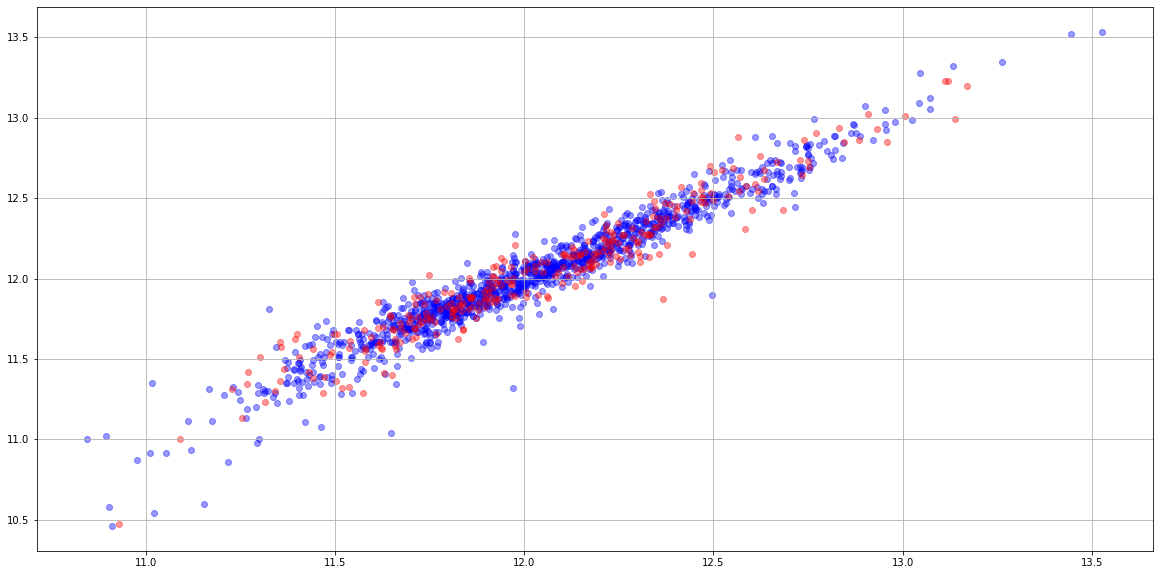

In [17]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_ridge_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_ridge_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [18]:
ridge_coef_strd = pd.Series(gs_ridge_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(ridge_coef_strd.abs().sort_values(ascending=False).to_string())

GrLivArea                                                           0.488291
1stFlrSF                                                            0.390652
OverallQual                                                         0.352889
BsmtFinSF1                                                          0.276200
TotalBsmtSF                                                         0.271648
OverallCond                                                         0.268577
LotArea                                                             0.238995
MSZoning_FV                                                         0.226567
2ndFlrSF                                                            0.208125
MSZoning_RL                                                         0.193080
MSZoning_RH                                                         0.180248
TotRmsAbvGrd                                                        0.178976
FullBath                                                            0.164935

In [19]:
ridge_coef_index_01 = [i for i, x in enumerate(ridge_coef_strd) if abs(x) > 0]

hp_ridge_strd_reduced = hp_full_strd.iloc[:,ridge_coef_index_01]

hp_ridge_strd_reduced

,LotFrontage,LotArea,Street,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YrSold_2006.0,YrSold_2007.0,YrSold_2008.0,YrSold_2009.0,YrSold_2010.0
0,0.150685,0.033420,1.0,0.0,1.0,0.666667,0.500,0.949275,0.883333,0.122500,0.666667,0.50,0.8,0.75,0.25,1.000000,0.176060,0.166667,0.000000,0.064212,0.168008,1.00,1.0,1.00,0.109641,0.413559,0.0,0.289015,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.461538,1.000000,0.00,0.996517

- because Ridge thinks all of the features have some kind of importance, the list is not actually of much value

## Trying w ElasticNet

In [20]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

enet = ElasticNet(random_state=state, max_iter=10000,
                  normalize=True, fit_intercept=True)

# parameters to use
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 0, 1, 10, 100]
l1ratio = [0, 0.25, 0.5, 0.75, 1]
fitintercept = [True, False]
precomputes = [True, False]
warmstart = [True, False]
selections = ['cyclic', 'random']

gparam_enet_1 = {'alpha': alphas,
                  'l1_ratio': l1ratio,
                  'fit_intercept': fitintercept,
                  'precompute': precomputes, 
                  'warm_start': warmstart,
                  'selection': selections,
                  'random_state': [state]}

# setting parameters
gs_enet_1 = ms.GridSearchCV(enet, gparam_enet_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_enet_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_enet_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_enet_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_enet_1, ytrain, xtrain))
test_rmse.append(rmse(gs_enet_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_enet_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
enet_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
enet_res_df = pd.DataFrame(enet_list_results).T
enet_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
enet_res_df = pd.concat([enet_res_df, best_par_df], axis=1, sort=False)

enet_res_df

Wall time: 54.7 s


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,alpha,fit_intercept,l1_ratio,precompute,random_state,selection,warm_start
0,0.933392,0.935214,0.102294,0.104783,-0.002489,0.0001,True,0.75,False,0,random,True


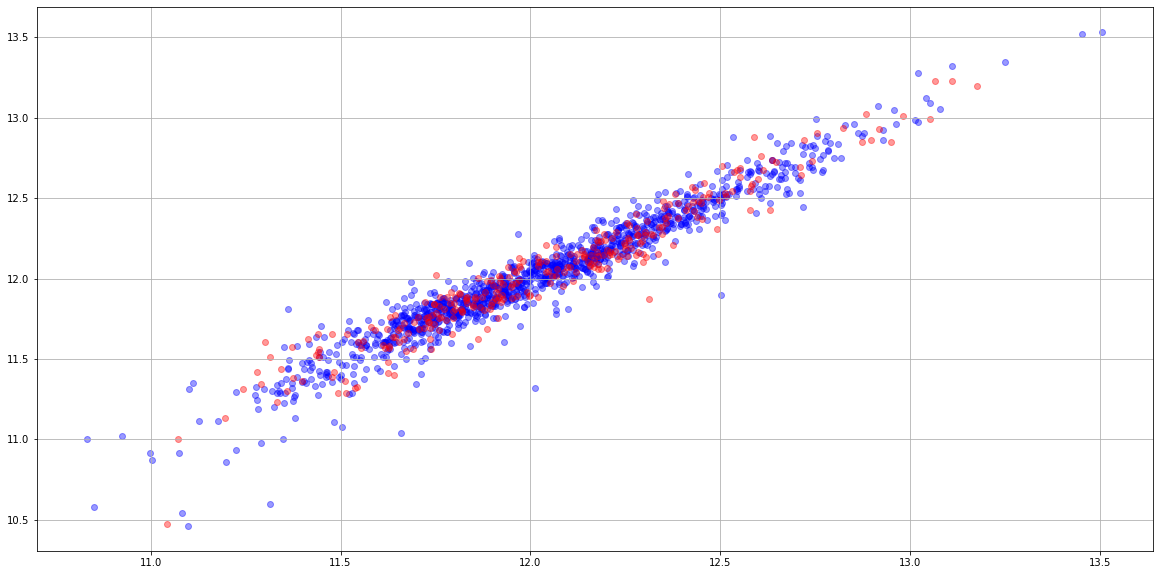

In [21]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_enet_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_enet_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [22]:
enet_coef_strd = pd.Series(gs_enet_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(enet_coef_strd.abs().sort_values(ascending=False).to_string())

GrLivArea                                                           0.797415
OverallQual                                                         0.429740
1stFlrSF                                                            0.403143
TotalBsmtSF                                                         0.363235
LotArea                                                             0.361454
OverallCond                                                         0.250705
BsmtFinSF1                                                          0.210385
Functional                                                          0.166151
Exterior1st_BrkComm                                                 0.147367
YearBuilt                                                           0.140250
KitchenAbvGr                                                        0.125913
GarageCars                                                          0.125412
Street                                                              0.125208

In [23]:
# columns that were dropped by enet

enet_coef_index_00 = [i for i, x in enumerate(enet_coef_strd) if abs(x) == 0]
hp_enet_strd_dropped = hp_full_strd.iloc[:, enet_coef_index_00]
list(hp_enet_strd_dropped.columns)

['Alley',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtUnfSF',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'GarageYrBlt',
 'EnclosedPorch',
 'PoolQC',
 'MiscVal',
 'MoSold',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_1-1/2 STORY PUD - ALL AGES',
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_2-STORY 1946 & NEWER',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'MSSubClass_SPLIT FOYER',
 'MSSubClass_SPLIT OR MULTI-LEVEL',
 'MSZoning_RM',
 'LotShape_IR3',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_FR2',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_Gilbert',
 'Neighborhood_NPkVill',
 'Neighborhood_SWISU',
 'Neigh

# Tree Models

## Trying w RFR

In [24]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

rfr = RandomForestRegressor()

# parameters to use
# maxdepth = [10, 25, 50, 100, 250, 500]
# minsamlf = [1, 2, 3, 4, 5]
# minsamsplt = [2, 3, 4, 5]
# nestimators = [100, 250, 400, 500]
# oobscore = [True, False]
# warmstart = [True, False]
# 'max_depth': maxdepth,
#               'min_samples_leaf': minsamlf,
#               'min_samples_split': minsamsplt,
#               'n_estimators': nestimators,
#               'oob_score': oobscore,
#               'warm_start': warmstart

gparam_rfr = {}

# setting parameters
gs_rfr = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                           scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_rfr.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_rfr.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_rfr, ytrain, xtrain))
test_rmse.append(rmse(gs_rfr, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_rfr.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
rfr_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

Wall time: 2.9 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE
0,0.982152,0.908171,0.052951,0.124751,-0.071799


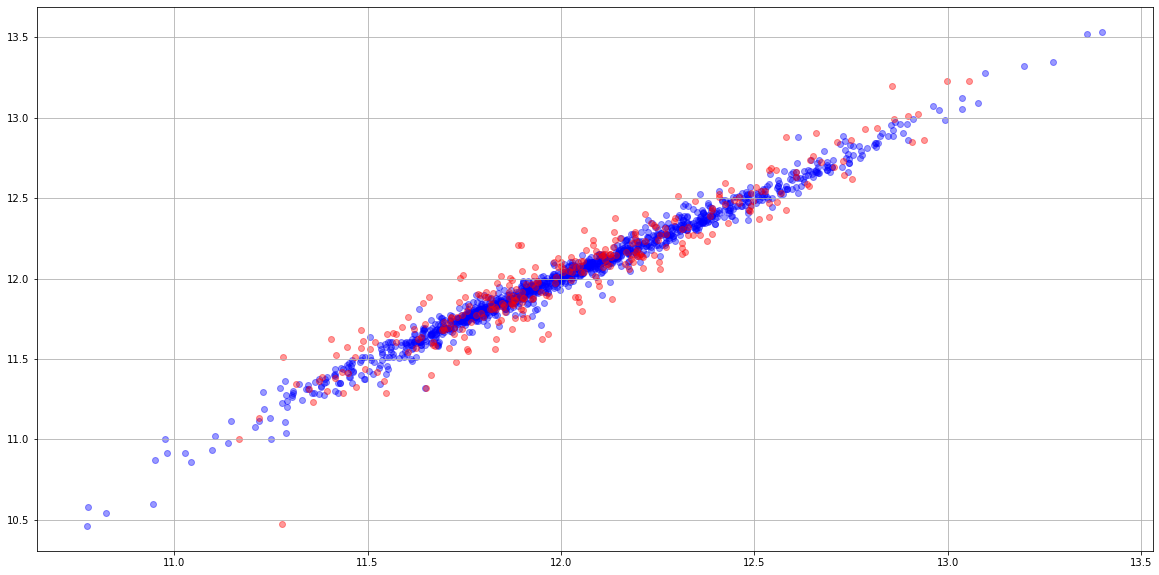

In [25]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_rfr.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [26]:
sorted_importance_rfr = sorted(zip(hp_full_strd.columns,
                                   gs_rfr.best_estimator_.feature_importances_),
                               key=lambda t:t[1], reverse=True)
sorted_importance_rfr

[('OverallQual', 0.5304900023340842),
 ('GrLivArea', 0.10581265918232666),
 ('TotalBsmtSF', 0.050949353527076274),
 ('GarageArea', 0.03244408723332843),
 ('GarageCars', 0.029772159907683015),
 ('BsmtFinSF1', 0.02383851720678884),
 ('1stFlrSF', 0.018551169624022236),
 ('YearBuilt', 0.014842325612905686),
 ('LotArea', 0.012942695014713236),
 ('OverallCond', 0.011901628597827004),
 ('CentralAir', 0.011492375788996749),
 ('YearRemodAdd', 0.010900920686304055),
 ('GarageYrBlt', 0.008130500547622424),
 ('BsmtUnfSF', 0.00629110789112384),
 ('GarageCond', 0.005464582955495837),
 ('2ndFlrSF', 0.005460882496687721),
 ('LotFrontage', 0.005387950577349536),
 ('BsmtFinType1', 0.005061304288484882),
 ('FireplaceQu_None', 0.004767233389597854),
 ('GarageFinish', 0.004734492744363698),
 ('BsmtQual', 0.004403429377064702),
 ('GarageType_Detchd', 0.0043722533747346266),
 ('MSZoning_RM', 0.004328866578208589),
 ('OpenPorchSF', 0.004211202912996796),
 ('KitchenQual', 0.004011768085458142),
 ('ExterCond', 

In [27]:
filtered_sorted_importance_rfr = [x for x in sorted_importance_rfr if x[1]>0]
filtered_sorted_importance_rfr

[('OverallQual', 0.5304900023340842),
 ('GrLivArea', 0.10581265918232666),
 ('TotalBsmtSF', 0.050949353527076274),
 ('GarageArea', 0.03244408723332843),
 ('GarageCars', 0.029772159907683015),
 ('BsmtFinSF1', 0.02383851720678884),
 ('1stFlrSF', 0.018551169624022236),
 ('YearBuilt', 0.014842325612905686),
 ('LotArea', 0.012942695014713236),
 ('OverallCond', 0.011901628597827004),
 ('CentralAir', 0.011492375788996749),
 ('YearRemodAdd', 0.010900920686304055),
 ('GarageYrBlt', 0.008130500547622424),
 ('BsmtUnfSF', 0.00629110789112384),
 ('GarageCond', 0.005464582955495837),
 ('2ndFlrSF', 0.005460882496687721),
 ('LotFrontage', 0.005387950577349536),
 ('BsmtFinType1', 0.005061304288484882),
 ('FireplaceQu_None', 0.004767233389597854),
 ('GarageFinish', 0.004734492744363698),
 ('BsmtQual', 0.004403429377064702),
 ('GarageType_Detchd', 0.0043722533747346266),
 ('MSZoning_RM', 0.004328866578208589),
 ('OpenPorchSF', 0.004211202912996796),
 ('KitchenQual', 0.004011768085458142),
 ('ExterCond', 

## Trying w GBR

In [28]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

gbm = GradientBoostingRegressor()

# learningrate = [0.01, 0.05, 0.1, 0.5, 1] # subsequently, fine tune
# nestimators = [5, 10, 50, 100, 200, 300, 400, 500]
# maxfeatures = [9, 20, 40, 60, 100, 150, 176]
# maxdepth = [1, 2, 3, 4, 5]
# 'learning_rate': learningrate,
#               'n_estimators': nestimators, 
#               'max_features': maxfeatures,
#               'max_depth': maxdepth

gparam_gbm = {}

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_gbm.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_gbm.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_gbm, ytrain, xtrain))
test_rmse.append(rmse(gs_gbm, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_gbm.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
gbm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
gbm_res_df = pd.DataFrame(gbm_list_results).T
gbm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
gbm_res_df = pd.concat([gbm_res_df, best_par_df], axis=1, sort=False)

gbm_res_df

Wall time: 1.16 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE
0,0.961136,0.922354,0.078137,0.114712,-0.036575


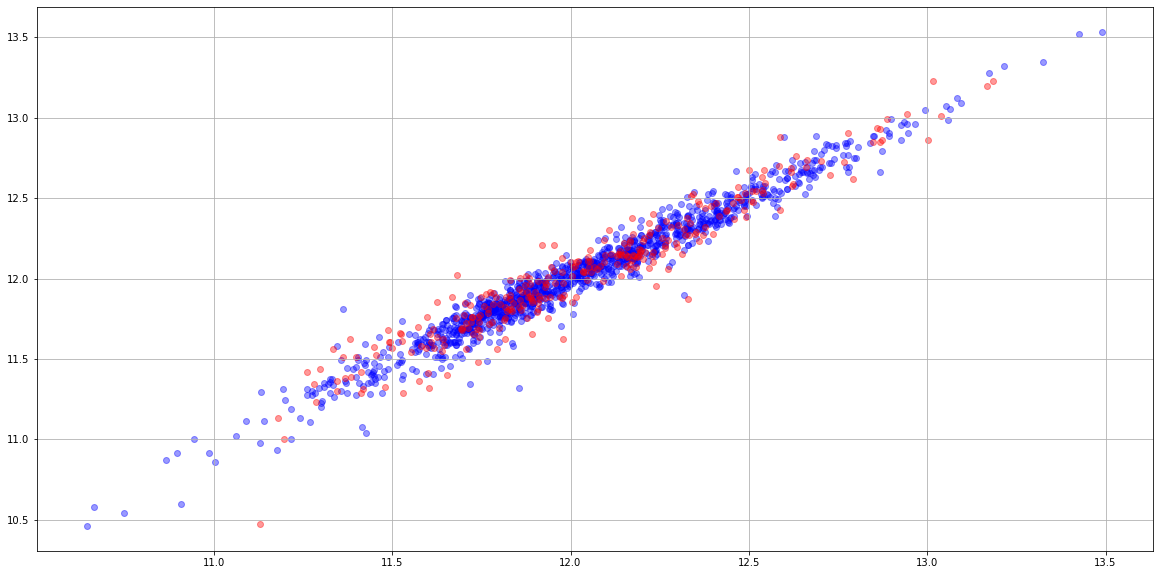

In [29]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [30]:
sorted_importance_gbm = sorted(zip(hp_full_strd.columns,
                                   gs_gbm.best_estimator_.feature_importances_),
                               key=lambda t:t[1], reverse=True)
sorted_importance_gbm

[('OverallQual', 0.39967307544201175),
 ('GrLivArea', 0.1734337647470797),
 ('KitchenQual', 0.06146056278551489),
 ('TotalBsmtSF', 0.045350411369820466),
 ('GarageCars', 0.04088993874572264),
 ('BsmtFinSF1', 0.02549796734409636),
 ('ExterQual', 0.022621364775304614),
 ('YearBuilt', 0.02153905315086097),
 ('BsmtQual', 0.020037093437479836),
 ('YearRemodAdd', 0.01984555207321229),
 ('LotArea', 0.01660486004223379),
 ('OverallCond', 0.014914658480344664),
 ('GarageArea', 0.014197726582487327),
 ('GarageFinish', 0.013758539544229134),
 ('CentralAir', 0.013394103751151716),
 ('1stFlrSF', 0.011083102911558531),
 ('GarageCond', 0.009223310130721897),
 ('FireplaceQu_None', 0.009192648078231572),
 ('MSZoning_RL', 0.006470587567191787),
 ('Fireplaces', 0.005602868182344047),
 ('GarageYrBlt', 0.004846850899330093),
 ('BsmtFinType1', 0.00435101018936291),
 ('LotFrontage', 0.0028287106093985086),
 ('OpenPorchSF', 0.0024110090741629566),
 ('BsmtExposure', 0.002330864481085497),
 ('Functional', 0.002

In [31]:
filtered_sorted_importance_gbm = [x for x in sorted_importance_gbm if x[1]>0]
filtered_sorted_importance_gbm

[('OverallQual', 0.39967307544201175),
 ('GrLivArea', 0.1734337647470797),
 ('KitchenQual', 0.06146056278551489),
 ('TotalBsmtSF', 0.045350411369820466),
 ('GarageCars', 0.04088993874572264),
 ('BsmtFinSF1', 0.02549796734409636),
 ('ExterQual', 0.022621364775304614),
 ('YearBuilt', 0.02153905315086097),
 ('BsmtQual', 0.020037093437479836),
 ('YearRemodAdd', 0.01984555207321229),
 ('LotArea', 0.01660486004223379),
 ('OverallCond', 0.014914658480344664),
 ('GarageArea', 0.014197726582487327),
 ('GarageFinish', 0.013758539544229134),
 ('CentralAir', 0.013394103751151716),
 ('1stFlrSF', 0.011083102911558531),
 ('GarageCond', 0.009223310130721897),
 ('FireplaceQu_None', 0.009192648078231572),
 ('MSZoning_RL', 0.006470587567191787),
 ('Fireplaces', 0.005602868182344047),
 ('GarageYrBlt', 0.004846850899330093),
 ('BsmtFinType1', 0.00435101018936291),
 ('LotFrontage', 0.0028287106093985086),
 ('OpenPorchSF', 0.0024110090741629566),
 ('BsmtExposure', 0.002330864481085497),
 ('Functional', 0.002

# Trying w XGBoost

In [32]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

xgb_t = xgboost.XGBRegressor()

# evalmetric = ['rmse']
# njobs = [-1]
# randomstate = [state]
# # booster_ = ['gbtree']

# nestimators = [1, 10, 20, 50, 100]
# minchildweight = [1, 3, 5]
# maxdepth = [1, 3, 5]
# learningrate = [0.01, 0.05, 0.1]
# gamma_ = [0.5, 1, 2, 5]
# subsample_ = [0.8, 1]
# # samplingmethod = ['uniform', 'gradient_based']
# colsamplebytree = [0.8, 1]
# lambda_ = [1, 3, 5]
# alpha_ = [1, 3, 5]
# 'eval_metric': evalmetric,
#                 'n_jobs': njobs,
# #                 'booster': booster_,
#                 'n_estimators': nestimators,
#                 'min_child_weight': minchildweight,
#                 'max_depth': maxdepth,
#                 'eta': learningrate,
#                 'gamma': gamma_,
#                 'subsample': subsample_,
# #                 'sampling_method': samplingmethod,
#                 'colsample_bytree': colsamplebytree,
#                 'lambda': lambda_,
#                 'alpha': alpha_,
#                 'random_state': randomstate


gparam_xgb_t = {}

gs_xgb_t = GridSearchCV(xgb_t, gparam_xgb_t, cv=n_folds, refit=True, verbose=1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_t.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_xgb_t.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_xgb_t.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_xgb_t, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb_t, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_xgb_t.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
xgb_t_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
xgb_t_res_df = pd.DataFrame(xgb_t_list_results).T
xgb_t_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_t_res_df = pd.concat([xgb_t_res_df, best_par_df], axis=1, sort=False)

xgb_t_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 1.15 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE
0,0.999529,0.91538,0.008601,0.119753,-0.111152


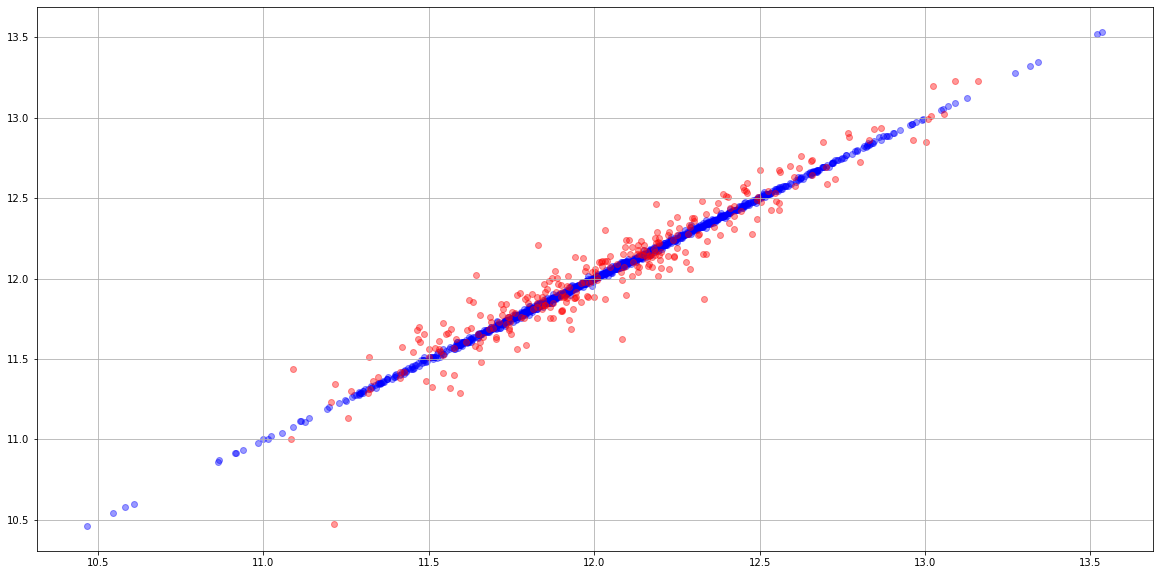

In [33]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_t.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb_t.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [34]:
sorted_importance_xgb_t = sorted(zip(hp_full_strd.columns,
                                   gs_xgb_t.best_estimator_.feature_importances_),
                               key=lambda t:t[1], reverse=True)
sorted_importance_xgb_t

[('GarageCond', 0.17990896),
 ('GarageType_Attchd', 0.11692525),
 ('KitchenQual', 0.10276768),
 ('OverallQual', 0.0791046),
 ('Fireplaces', 0.05958339),
 ('MSZoning_RM', 0.04155426),
 ('GarageCars', 0.037788413),
 ('GrLivArea', 0.036594853),
 ('CentralAir', 0.036025576),
 ('TotalBsmtSF', 0.023143115),
 ('BsmtFinSF1', 0.012206661),
 ('KitchenAbvGr', 0.0094235465),
 ('Neighborhood_Crawfor', 0.009386443),
 ('Neighborhood_MeadowV', 0.009000588),
 ('HouseStyle_2.5Unf', 0.00896289),
 ('BsmtFinType1', 0.0076153674),
 ('ExterQual', 0.0074908747),
 ('Neighborhood_NAmes', 0.0070565958),
 ('Alley', 0.006827461),
 ('Heating_Grav', 0.006606715),
 ('Street', 0.006394107),
 ('BsmtQual', 0.006375517),
 ('Functional', 0.0061604795),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.005760833),
 ('ExterCond', 0.0056505),
 ('ScreenPorch', 0.0050206995),
 ('YearBuilt', 0.0049980045),
 ('PoolArea', 0.0049636196),
 ('Neighborhood_Edwards', 0.004930667),
 ('OverallCond', 0.0048838775),
 ('SaleCondition_Normal', 0.00488

In [35]:
filtered_sorted_importance_xgb_t = [x for x in sorted_importance_xgb_t if x[1]>0]
filtered_sorted_importance_xgb_t

[('GarageCond', 0.17990896),
 ('GarageType_Attchd', 0.11692525),
 ('KitchenQual', 0.10276768),
 ('OverallQual', 0.0791046),
 ('Fireplaces', 0.05958339),
 ('MSZoning_RM', 0.04155426),
 ('GarageCars', 0.037788413),
 ('GrLivArea', 0.036594853),
 ('CentralAir', 0.036025576),
 ('TotalBsmtSF', 0.023143115),
 ('BsmtFinSF1', 0.012206661),
 ('KitchenAbvGr', 0.0094235465),
 ('Neighborhood_Crawfor', 0.009386443),
 ('Neighborhood_MeadowV', 0.009000588),
 ('HouseStyle_2.5Unf', 0.00896289),
 ('BsmtFinType1', 0.0076153674),
 ('ExterQual', 0.0074908747),
 ('Neighborhood_NAmes', 0.0070565958),
 ('Alley', 0.006827461),
 ('Heating_Grav', 0.006606715),
 ('Street', 0.006394107),
 ('BsmtQual', 0.006375517),
 ('Functional', 0.0061604795),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.005760833),
 ('ExterCond', 0.0056505),
 ('ScreenPorch', 0.0050206995),
 ('YearBuilt', 0.0049980045),
 ('PoolArea', 0.0049636196),
 ('Neighborhood_Edwards', 0.004930667),
 ('OverallCond', 0.0048838775),
 ('SaleCondition_Normal', 0.00488

# Combine the lists of importances

In [36]:
lasso_list = list(hp_lasso_strd_reduced.columns)
enet_list = list(hp_enet_strd_dropped.columns)
rfr_list = [x[0] for x in filtered_sorted_importance_rfr]
gbm_list = [x[0] for x in filtered_sorted_importance_gbm]
xgb_list = [x[0] for x in filtered_sorted_importance_xgb_t]

full_list = list(set(lasso_list + enet_list + rfr_list + gbm_list + xgb_list))
full_list

['Neighborhood_ClearCr',
 'BsmtCond',
 'LandSlope_Mod',
 'FullBath',
 'Exterior2nd_ImStucc',
 'SaleType_WD',
 'PoolArea',
 'Neighborhood_Mitchel',
 'RoofMatl_WdShake',
 'BldgType_TwnhsI',
 'Foundation_Stone',
 'MasVnrType_BrkFace',
 'BsmtExposure',
 'HouseStyle_2Story',
 'Neighborhood_IDOTRR',
 'HouseStyle_SLvl',
 'LotConfig_FR3',
 'Exterior1st_Wd Sdng',
 '1stFlrSF',
 'Exterior2nd_CBlock',
 'Exterior2nd_Other',
 'BsmtUnfSF',
 'HouseStyle_1.5Unf',
 'SaleType_Con',
 'Neighborhood_SawyerW',
 'GarageQual',
 'Neighborhood_Crawfor',
 'Electrical',
 'MiscVal',
 'Neighborhood_Blueste',
 'LotShape_IR2',
 'Exterior2nd_Plywood',
 'OverallCond',
 'Condition1_PosA',
 'BldgType_Duplex',
 'Condition1_RRNe',
 'BsmtQual',
 'GarageType_Basment',
 'Exterior1st_ImStucc',
 'Condition2_Norm',
 'LotConfig_FR2',
 'MasVnrArea',
 'BsmtFinSF2',
 'LowQualFinSF',
 '3SsnPorch',
 'BldgType_2fmCon',
 'Fence',
 'MSSubClass_SPLIT FOYER',
 'YrSold_2010.0',
 'Neighborhood_Somerst',
 'RoofStyle_Gambrel',
 'HouseStyle_SFoy

In [37]:
pd.DataFrame(lasso_list).to_csv('..\hp_2b_important_feat_lasso.csv')
pd.DataFrame(enet_list).to_csv('..\hp_2b_important_feat_enet.csv')
pd.DataFrame(rfr_list).to_csv('..\hp_2b_important_feat_rfr.csv')
pd.DataFrame(gbm_list).to_csv('..\hp_2b_important_feat_gbr.csv')
pd.DataFrame(xgb_list).to_csv('..\hp_2b_important_feat_xgb.csv')
pd.DataFrame(full_list).to_csv('..\hp_2b_important_feat_full.csv')

In [38]:
test = pd.read_csv('..\hp_2a_ranked_edited_dum_full_test.csv', index_col=0)

# test_lasso_rdc = test[hp_lasso_strd_reduced.columns]

prediction = pd.DataFrame(gs_lasso_1.best_estimator_.predict(test))

prediction = prediction.reset_index()
prediction['index'] = prediction['index'] + 1461
prediction.columns = ['Id', 'SalePrice']
prediction['SalePrice'] = np.exp(prediction['SalePrice'])

prediction.to_csv('oct_try2.csv', index=False, encoding='utf-8')

prediction

#.13288

,Id,SalePrice
0,1461,112461.608662
1,1462,158963.543185
2,1463,175222.255583
3,1464,196679.326443
4,1465,201767.483203
...,...,...
1454,2915,85488.356851
1455,2916,82815.769284
1456,2917,167233.661302
1457,2918,115858.389360
